# Setting pyspark environment

In [1]:
import os
import sys

os.environ["SPARK_HOME"] = "/usr/spark2.4.3"
os.environ["PYLIB"] = os.environ["SPARK_HOME"] + "/python/lib"
os.environ["PYSPARK_PYTHON"] = "/usr/local/anaconda/bin/python" 
os.environ["PYSPARK_DRIVER_PYTHON"] = "/usr/local/anaconda/bin/python"
sys.path.insert(0, os.environ["PYLIB"] +"/py4j-0.10.7-src.zip")
sys.path.insert(0, os.environ["PYLIB"] +"/pyspark.zip")
 
from pyspark import SparkContext, SparkConf
from pyspark.sql import SQLContext

from pyspark.sql import SparkSession
from functools import reduce
from pyspark.sql.functions import col, lit, when,count,isnan
import pyspark.sql.functions as func


In [2]:
# NEW SPARK DEFINITION
import pyspark
from pyspark import SparkConf
from pyspark.sql import SparkSession
spark = SparkSession.builder.getOrCreate()
sqlContext = SQLContext(spark)

In [3]:
# import python sql libraries and other functions 
from pyspark.sql.types import *
from pyspark.sql import Row
from pyspark.sql.functions import *
import pixiedust

Pixiedust database opened successfully


# Loading dataset in dataframe

In [4]:
#creating a DataFrame directly from Heart csv file 

heart= spark.read.option("header", "true").option("delimiter", ",")\
.option("inferSchema", "true").csv("hdfs:///user/imat5322_616807/heart.csv")

# Exploratory data analysis

In [5]:
heart.take(5)

[Row(HeartDisease='No', BMI=16.6, Smoking='Yes', AlcoholDrinking='No', Stroke='No', PhysicalHealth=3.0, MentalHealth=30.0, DiffWalking='No', Sex='Female', AgeCategory='55-59', Race='White', Diabetic='Yes', PhysicalActivity='Yes', GenHealth='Very good', SleepTime=5.0, Asthma='Yes', KidneyDisease='No', SkinCancer='Yes'),
 Row(HeartDisease='No', BMI=20.34, Smoking='No', AlcoholDrinking='No', Stroke='Yes', PhysicalHealth=0.0, MentalHealth=0.0, DiffWalking='No', Sex='Female', AgeCategory='80 or older', Race='White', Diabetic='No', PhysicalActivity='Yes', GenHealth='Very good', SleepTime=7.0, Asthma='No', KidneyDisease='No', SkinCancer='No'),
 Row(HeartDisease='No', BMI=26.58, Smoking='Yes', AlcoholDrinking='No', Stroke='No', PhysicalHealth=20.0, MentalHealth=30.0, DiffWalking='No', Sex='Male', AgeCategory='65-69', Race='White', Diabetic='Yes', PhysicalActivity='Yes', GenHealth='Fair', SleepTime=8.0, Asthma='Yes', KidneyDisease='No', SkinCancer='No'),
 Row(HeartDisease='No', BMI=24.21, Smoki

In [6]:
heart.dtypes

[('HeartDisease', 'string'),
 ('BMI', 'double'),
 ('Smoking', 'string'),
 ('AlcoholDrinking', 'string'),
 ('Stroke', 'string'),
 ('PhysicalHealth', 'double'),
 ('MentalHealth', 'double'),
 ('DiffWalking', 'string'),
 ('Sex', 'string'),
 ('AgeCategory', 'string'),
 ('Race', 'string'),
 ('Diabetic', 'string'),
 ('PhysicalActivity', 'string'),
 ('GenHealth', 'string'),
 ('SleepTime', 'double'),
 ('Asthma', 'string'),
 ('KidneyDisease', 'string'),
 ('SkinCancer', 'string')]

In [7]:
#print number of rows and columns 
print((heart.count(), len(heart.columns)))

(319795, 18)


In [8]:
#checking for NUll values in dataset
heart.select([count(when(col(c).isNull(),c)).alias(c) for c in heart.columns]).show()

+------------+---+-------+---------------+------+--------------+------------+-----------+---+-----------+----+--------+----------------+---------+---------+------+-------------+----------+
|HeartDisease|BMI|Smoking|AlcoholDrinking|Stroke|PhysicalHealth|MentalHealth|DiffWalking|Sex|AgeCategory|Race|Diabetic|PhysicalActivity|GenHealth|SleepTime|Asthma|KidneyDisease|SkinCancer|
+------------+---+-------+---------------+------+--------------+------------+-----------+---+-----------+----+--------+----------------+---------+---------+------+-------------+----------+
|           0|  0|      0|              0|     0|             0|           0|          0|  0|          0|   0|       0|               0|        0|        0|     0|            0|         0|
+------------+---+-------+---------------+------+--------------+------------+-----------+---+-----------+----+--------+----------------+---------+---------+------+-------------+----------+



In [9]:
#checking balance of dataset
data=heart.groupBy('HeartDisease').count()
data.show()

+------------+------+
|HeartDisease| count|
+------------+------+
|          No|292422|
|         Yes| 27373|
+------------+------+




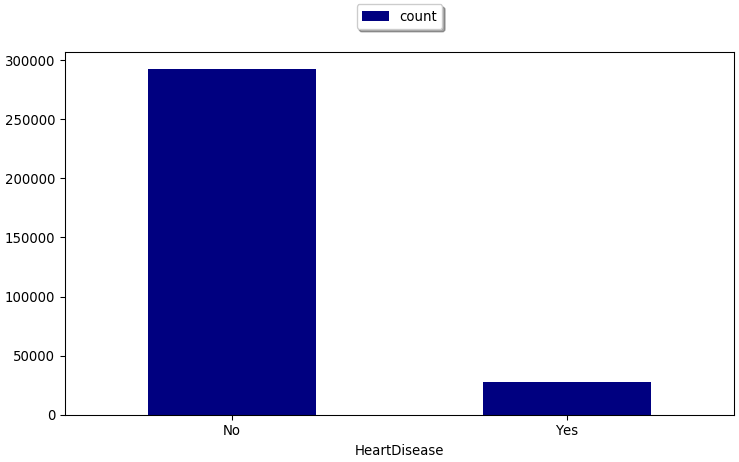

In [10]:
display(data)

## Analysis to find relation between General Health, Physical activity and BMI 


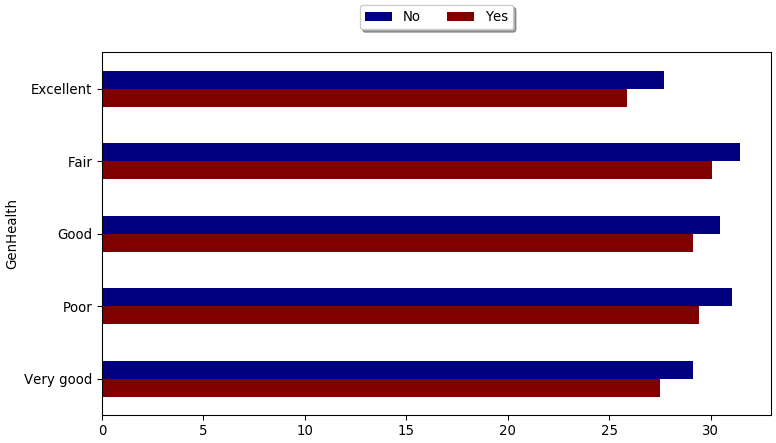

In [11]:
data1=heart.groupBy('GenHealth','PhysicalActivity').agg(avg('BMI').alias('avg BMI'))
display(data1)

## Analysis to find relation between Age Category, Sex and Average Sleep time 


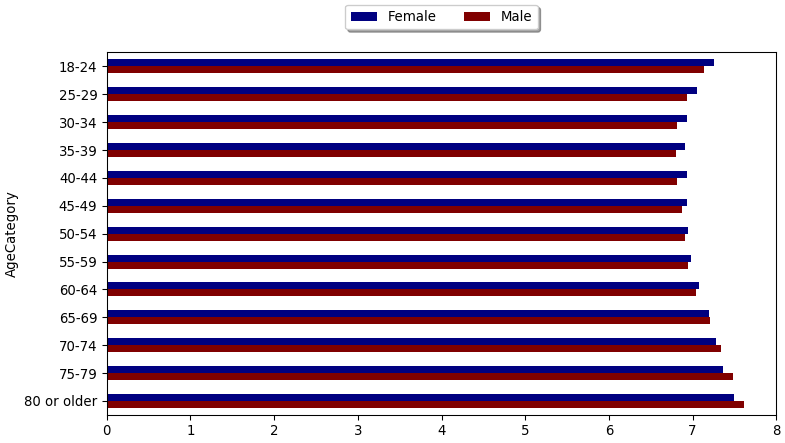

In [12]:
data1=heart.groupBy('AgeCategory','Sex').agg(avg('SleepTime').alias('avg SleepTime'))
display(data1)

# Data analysis to select best features for  ML model

In [13]:
# Analysis to check impact of smoking on heart disease
data=heart.groupBy('Smoking','HeartDisease').count()
data=data.filter(col('Smoking').contains('Yes')).show()

+-------+------------+------+
|Smoking|HeartDisease| count|
+-------+------------+------+
|    Yes|         Yes| 16037|
|    Yes|          No|115871|
+-------+------------+------+



Number of people who smoke and have heart disease was 16,037 while number of people who smoke and do not have heart disease was found to be 115,871 which indicates smoking doesnt have much impact on heart disease.


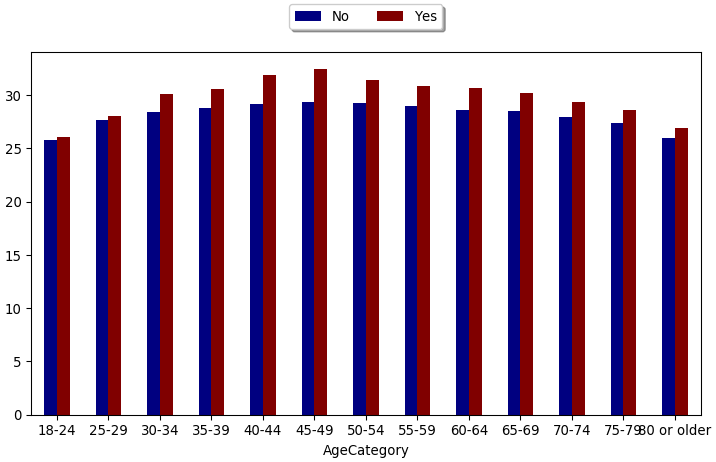

In [12]:
# Analysis to check impact of bmi on heart disease
data1=heart.groupBy('AgeCategory','HeartDisease').agg(avg('BMI').alias('average BMI'))
display(data1)

On all age groups, people with higher BMI is likely to have heart disease, which indicates direct impact of BMI on heart disease.

In [13]:
# Analysis to check impact of alcohol drinking on heart disease
data2=heart.groupBy('AlcoholDrinking','HeartDisease').count()
data2=data2.filter(col('AlcoholDrinking').contains('Yes')).show()

+---------------+------------+-----+
|AlcoholDrinking|HeartDisease|count|
+---------------+------------+-----+
|            Yes|         Yes| 1141|
|            Yes|          No|20636|
+---------------+------------+-----+



Number of people who consumes alcohol and have heart disease was found to be 1,141 while number of people who consumes alocohol and does not have heart disease was found to be 20,636; indicating there is no much evidence to show consumption of alcohol causes heart disease.

In [14]:
# Analysis to check impact of stroke on heart disease
data3=heart.groupBy('Stroke','HeartDisease').count()
data3=data3.filter(col('Stroke').contains('Yes')).show()

+------+------------+-----+
|Stroke|HeartDisease|count|
+------+------------+-----+
|   Yes|         Yes| 4389|
|   Yes|          No| 7680|
+------+------------+-----+



Results shows possibility of a person who had stroke is at the risk of having heart disease.


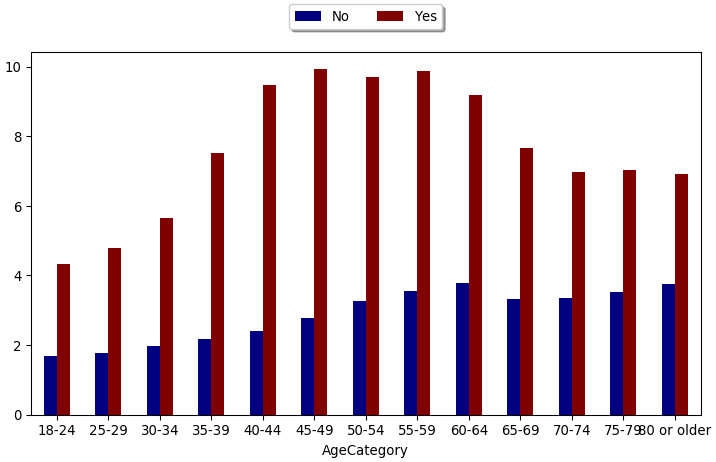

In [15]:
# Analysis to check impact of physical health on heart disease
data4=heart.groupBy('AgeCategory','HeartDisease').agg(avg('PhysicalHealth').alias('avg PhysicalHealth'))
display(data4)

On all age category, people with atleast 4 days of continous bad physical health is likely to have heart disease.


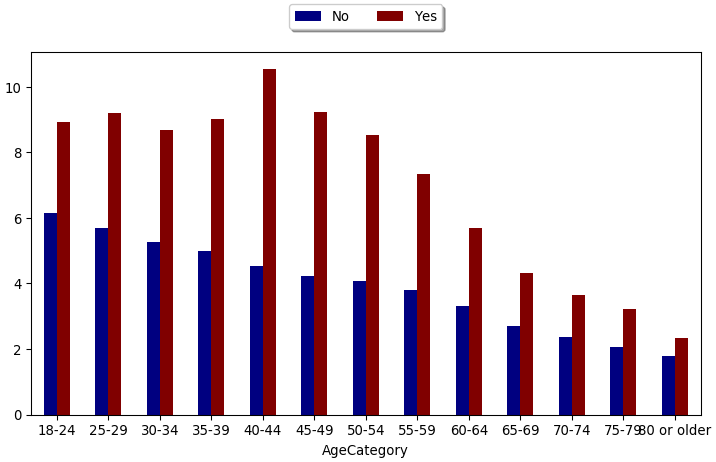

In [12]:
# Analysis to check impact of mental health on heart disease
data5=heart.groupBy('AgeCategory','HeartDisease').agg(avg('MentalHealth').alias('avg MentalHealth'))
display(data5)


Analysis indicates mental health has impact on heart disease.

In [17]:
# Analysis to check impact of difficulty in walking on heart disease
data6=heart.groupBy('DiffWalking','HeartDisease').count()
data6=data6.filter(col('DiffWalking').contains('Yes')).show()


+-----------+------------+-----+
|DiffWalking|HeartDisease|count|
+-----------+------------+-----+
|        Yes|         Yes|10028|
|        Yes|          No|34382|
+-----------+------------+-----+



Analysis indicates there is chance of heart disease for people having difficulty walking.

In [18]:
# Analysis to check impact of gender on heart disease
data7=heart.groupBy('Sex','HeartDisease').count()
data7.show()

+------+------------+------+
|   Sex|HeartDisease| count|
+------+------------+------+
|  Male|          No|135851|
|  Male|         Yes| 16139|
|Female|          No|156571|
|Female|         Yes| 11234|
+------+------------+------+



Analysis indicates males are more likely to have heart disease compared to females.

In [19]:
# Analysis to check impact of race on heart disease
data8=heart.groupBy('Race','HeartDisease').count()
data8=data8.filter(col('HeartDisease').contains('Yes')).show()

+--------------------+------------+-----+
|                Race|HeartDisease|count|
+--------------------+------------+-----+
|               Black|         Yes| 1729|
|               White|         Yes|22507|
|               Asian|         Yes|  266|
|American Indian/A...|         Yes|  542|
|            Hispanic|         Yes| 1443|
|               Other|         Yes|  886|
+--------------------+------------+-----+



Analysis indicates white people have much higher chance of having heart disease.

In [20]:
# Analysis to check impact of diabetic on heart disease
data9=heart.groupBy('Diabetic','HeartDisease').count()
data9=data9.show()


+--------------------+------------+------+
|            Diabetic|HeartDisease| count|
+--------------------+------------+------+
|                 Yes|         Yes|  8957|
|                  No|          No|252134|
|No, borderline di...|         Yes|   789|
|                 Yes|          No| 31845|
|Yes (during pregn...|          No|  2451|
|                  No|         Yes| 17519|
|Yes (during pregn...|         Yes|   108|
|No, borderline di...|          No|  5992|
+--------------------+------------+------+



People who are not diabetic have less chance of having heart disease.

In [21]:
# Analysis to check impact of physical activity on heart disease
data10=heart.groupBy('PhysicalActivity','HeartDisease').count()
data10=data10.show()

+----------------+------------+------+
|PhysicalActivity|HeartDisease| count|
+----------------+------------+------+
|             Yes|         Yes| 17489|
|              No|          No| 61954|
|             Yes|          No|230468|
|              No|         Yes|  9884|
+----------------+------------+------+



Analysis indicates people with physical activity is likely to have less chance of heart disease.

In [22]:
# Analysis to check impact of general health on heart disease
data8=heart.groupBy('GenHealth','HeartDisease').count()
data8=data8.filter(col('HeartDisease').contains('No')).show()

+---------+------------+------+
|GenHealth|HeartDisease| count|
+---------+------------+------+
|     Fair|          No| 27593|
|     Poor|          No|  7439|
|Excellent|          No| 65342|
|     Good|          No| 83571|
|Very good|          No|108477|
+---------+------------+------+



As the general health of a person increases, they are less likely to have heart disease.


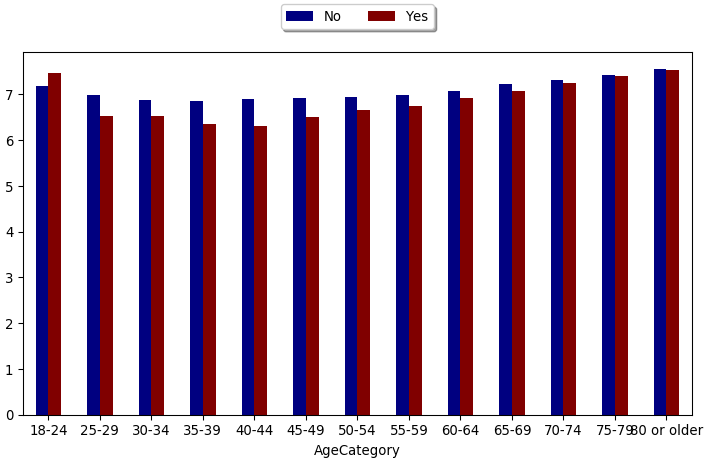

In [ ]:
# Analysis to check impact of sleeping time on heart disease
data5=heart.groupBy('AgeCategory','HeartDisease').agg(avg('SleepTime').alias('avg SleepTime'))
display(data5)

Except in early adolscent age, increase in average sleep time is likely to reduce the chance of an individual to develop heart disease.

In [24]:
# Analysis to check impact of asthma on heart disease
data10=heart.groupBy('Asthma','HeartDisease').count()
data10=data10.show()

+------+------------+------+
|Asthma|HeartDisease| count|
+------+------------+------+
|   Yes|         Yes|  4933|
|    No|          No|254483|
|   Yes|          No| 37939|
|    No|         Yes| 22440|
+------+------------+------+



Analysis shows asthma does not really have impact on heart disease. 

In [25]:
# Analysis to check impact of kidney disease on heart disease
data10=heart.groupBy('KidneyDisease','HeartDisease').count()
data10=data10.show()

+-------------+------------+------+
|KidneyDisease|HeartDisease| count|
+-------------+------------+------+
|          Yes|         Yes|  3455|
|           No|          No|284098|
|          Yes|          No|  8324|
|           No|         Yes| 23918|
+-------------+------------+------+



Analysis shows very few people have both kidney and heart disease, which shows they are not significantly related.

In [26]:
# Analysis to check impact of skin cancer on heart disease
data10=heart.groupBy('SkinCancer','HeartDisease').count()
data10=data10.show()

+----------+------------+------+
|SkinCancer|HeartDisease| count|
+----------+------------+------+
|       Yes|         Yes|  4980|
|        No|          No|267583|
|       Yes|          No| 24839|
|        No|         Yes| 22393|
+----------+------------+------+



Analysis indicates very less people have both skin cancer and heart disease, which shows skin cancer doesnt have significant impact on heart disease.

### Based on above analytics, we have found smoking, alchohol drinking, asthma, kidney disease and skin cancer does not have significant impact on heart disease. So we are dropping these columns, for training the ML model. 

In [27]:
#dropping insignificant columns from dataframe
heart_finalData=heart.drop('Smoking','AlcoholDrinking','Asthma','KidneyDisease','SkinCancer')
heart_finalData.printSchema()

root
 |-- HeartDisease: string (nullable = true)
 |-- BMI: double (nullable = true)
 |-- Stroke: string (nullable = true)
 |-- PhysicalHealth: double (nullable = true)
 |-- MentalHealth: double (nullable = true)
 |-- DiffWalking: string (nullable = true)
 |-- Sex: string (nullable = true)
 |-- AgeCategory: string (nullable = true)
 |-- Race: string (nullable = true)
 |-- Diabetic: string (nullable = true)
 |-- PhysicalActivity: string (nullable = true)
 |-- GenHealth: string (nullable = true)
 |-- SleepTime: double (nullable = true)



# Data preprocessing for Machine Learning algorithms

## String Indexer 

In [28]:
#importing String Indexer
from pyspark.ml.feature import StringIndexer
from pyspark.ml import Pipeline

In [29]:
#list of categorical variables to convert
category=['Stroke','DiffWalking','Sex','AgeCategory','Race','Diabetic',\
         'PhysicalActivity','GenHealth']

In [30]:
#Passing dataframe and the list of categorical variable to String Indexer for transformation
indexers = [StringIndexer(inputCol=column, outputCol=column+"_index").fit(heart_finalData) for column in category]
pipeline= Pipeline(stages=indexers)
df_r = pipeline.fit(heart_finalData).transform(heart_finalData)
df_r.show()            

+------------+-----+------+--------------+------------+-----------+------+-----------+-----+--------------------+----------------+---------+---------+------------+-----------------+---------+-----------------+----------+--------------+----------------------+---------------+
|HeartDisease|  BMI|Stroke|PhysicalHealth|MentalHealth|DiffWalking|   Sex|AgeCategory| Race|            Diabetic|PhysicalActivity|GenHealth|SleepTime|Stroke_index|DiffWalking_index|Sex_index|AgeCategory_index|Race_index|Diabetic_index|PhysicalActivity_index|GenHealth_index|
+------------+-----+------+--------------+------------+-----------+------+-----------+-----+--------------------+----------------+---------+---------+------------+-----------------+---------+-----------------+----------+--------------+----------------------+---------------+
|          No| 16.6|    No|           3.0|        30.0|         No|Female|      55-59|White|                 Yes|             Yes|Very good|      5.0|         0.0|            

In [31]:
#dropping the columns with datatype string
df=df_r.drop(*category)
#Print datatype of newly created columns after transformation
df.dtypes

[('HeartDisease', 'string'),
 ('BMI', 'double'),
 ('PhysicalHealth', 'double'),
 ('MentalHealth', 'double'),
 ('SleepTime', 'double'),
 ('Stroke_index', 'double'),
 ('DiffWalking_index', 'double'),
 ('Sex_index', 'double'),
 ('AgeCategory_index', 'double'),
 ('Race_index', 'double'),
 ('Diabetic_index', 'double'),
 ('PhysicalActivity_index', 'double'),
 ('GenHealth_index', 'double')]

## One Hot Encoder Estimator 

In [32]:
# importing OneHotEncoderEstimator
from pyspark.ml.feature import OneHotEncoderEstimator

In [33]:
# list of newly created numerical features to convert
column=['Stroke_index','Race_index','DiffWalking_index','Diabetic_index',\
       'Sex_index','AgeCategory_index','Race_index','PhysicalActivity_index','GenHealth_index']

In [34]:
#defining the input columns and output columns for onehotencoderestimator
encoder= OneHotEncoderEstimator(inputCols=['Stroke_index','DiffWalking_index','Diabetic_index','Sex_index',\
                                           'AgeCategory_index','Race_index','PhysicalActivity_index',\
                                           'GenHealth_index'],\
                                outputCols=['Stroke_vec','DiffWalking_vec','Diabetic_vec','Sex_vec',\
                                            'AgeCategory_vec','Race_vec','PhysicalActivity_vec','GenHealth_vec'])

In [35]:
#fit and transform of dataframe df with onehotencoder model  
model=encoder.fit(df)
encoded=model.transform(df)
#dropping previously created numerical values with String Indexer
encoded=encoded.drop(*column)
encoded.show()

+------------+-----+--------------+------------+---------+-------------+---------------+-------------+-------------+-------------+---------------+--------------------+-------------+
|HeartDisease|  BMI|PhysicalHealth|MentalHealth|SleepTime|     Race_vec|AgeCategory_vec|   Stroke_vec|GenHealth_vec|      Sex_vec|DiffWalking_vec|PhysicalActivity_vec| Diabetic_vec|
+------------+-----+--------------+------------+---------+-------------+---------------+-------------+-------------+-------------+---------------+--------------------+-------------+
|          No| 16.6|           3.0|        30.0|      5.0|(5,[0],[1.0])| (12,[3],[1.0])|(1,[0],[1.0])|(4,[0],[1.0])|(1,[0],[1.0])|  (1,[0],[1.0])|       (1,[0],[1.0])|(3,[1],[1.0])|
|          No|20.34|           0.0|         0.0|      7.0|(5,[0],[1.0])| (12,[5],[1.0])|    (1,[],[])|(4,[0],[1.0])|(1,[0],[1.0])|  (1,[0],[1.0])|       (1,[0],[1.0])|(3,[0],[1.0])|
|          No|26.58|          20.0|        30.0|      8.0|(5,[0],[1.0])| (12,[0],[1.0])|(1

In [36]:
#display datatypes of newly created features
encoded.dtypes

[('HeartDisease', 'string'),
 ('BMI', 'double'),
 ('PhysicalHealth', 'double'),
 ('MentalHealth', 'double'),
 ('SleepTime', 'double'),
 ('Race_vec', 'vector'),
 ('AgeCategory_vec', 'vector'),
 ('Stroke_vec', 'vector'),
 ('GenHealth_vec', 'vector'),
 ('Sex_vec', 'vector'),
 ('DiffWalking_vec', 'vector'),
 ('PhysicalActivity_vec', 'vector'),
 ('Diabetic_vec', 'vector')]

## Vector Assembler

In [37]:
#importing vector assembler
from pyspark.ml.feature import VectorAssembler

In [38]:
# list of assembler inputs
assemblerInputs=['BMI','PhysicalHealth','MentalHealth','SleepTime','Race_vec','AgeCategory_vec','GenHealth_vec',\
                 'Sex_vec','DiffWalking_vec','PhysicalActivity_vec','Diabetic_vec','Stroke_vec']

In [39]:
#passing dataframe into vector assembler to convert features into vectors
vector_assembler= VectorAssembler(inputCols=assemblerInputs,outputCol='features')
assembler_temp= vector_assembler.transform(encoded)
assembler_temp.show(5)

+------------+-----+--------------+------------+---------+-------------+---------------+-------------+-------------+-------------+---------------+--------------------+-------------+--------------------+
|HeartDisease|  BMI|PhysicalHealth|MentalHealth|SleepTime|     Race_vec|AgeCategory_vec|   Stroke_vec|GenHealth_vec|      Sex_vec|DiffWalking_vec|PhysicalActivity_vec| Diabetic_vec|            features|
+------------+-----+--------------+------------+---------+-------------+---------------+-------------+-------------+-------------+---------------+--------------------+-------------+--------------------+
|          No| 16.6|           3.0|        30.0|      5.0|(5,[0],[1.0])| (12,[3],[1.0])|(1,[0],[1.0])|(4,[0],[1.0])|(1,[0],[1.0])|  (1,[0],[1.0])|       (1,[0],[1.0])|(3,[1],[1.0])|(32,[0,1,2,3,4,12...|
|          No|20.34|           0.0|         0.0|      7.0|(5,[0],[1.0])| (12,[5],[1.0])|    (1,[],[])|(4,[0],[1.0])|(1,[0],[1.0])|  (1,[0],[1.0])|       (1,[0],[1.0])|(3,[0],[1.0])|(32,[0,

In [40]:
#dropping all features, except features in vector form
assembler=assembler_temp.drop('BMI','PhysicalHealth','MentalHealth','SleepTime','Race_vec','AgeCategory_vec',\
                              'GenHealth_vec','Sex_vec','DiffWalking_vec','PhysicalActivity_vec',\
                              'Diabetic_vec','Stroke_vec')
assembler.take(1)

[Row(HeartDisease='No', features=SparseVector(32, {0: 16.6, 1: 3.0, 2: 30.0, 3: 5.0, 4: 1.0, 12: 1.0, 21: 1.0, 25: 1.0, 26: 1.0, 27: 1.0, 29: 1.0, 31: 1.0}))]

## Transforming Target Categorical Variable 

In [41]:
#converting categorical target variable to numerical form
label_indexer= StringIndexer(inputCol='HeartDisease', outputCol="labelIndex")
ml_dataset=label_indexer.fit(assembler).transform(assembler)
ml_dataset=ml_dataset.drop('HeartDisease')
ml_dataset.show(5)

+--------------------+----------+
|            features|labelIndex|
+--------------------+----------+
|(32,[0,1,2,3,4,12...|       0.0|
|(32,[0,3,4,14,21,...|       0.0|
|(32,[0,1,2,3,4,9,...|       0.0|
|(32,[0,3,4,16,22,...|       0.0|
|(32,[0,1,3,4,18,2...|       0.0|
+--------------------+----------+
only showing top 5 rows



## Creating Train and Test Dataset 

In [42]:
(trainDataset,testDataset)=ml_dataset.randomSplit([0.7,0.3])

In [43]:
testDataset.show(3)

+--------------------+----------+
|            features|labelIndex|
+--------------------+----------+
|(32,[0,1,2,3,4,9,...|       0.0|
|(32,[0,1,2,3,4,9,...|       0.0|
|(32,[0,1,2,3,4,9,...|       0.0|
+--------------------+----------+
only showing top 3 rows



In [44]:
trainDataset.show(3)

+--------------------+----------+
|            features|labelIndex|
+--------------------+----------+
|(32,[0,1,2,3,4,9,...|       0.0|
|(32,[0,1,2,3,4,9,...|       0.0|
|(32,[0,1,2,3,4,9,...|       0.0|
+--------------------+----------+
only showing top 3 rows



# Machine Learning using Logistic Regression

In [45]:
from pyspark.ml.classification import LogisticRegression

In [46]:
from pyspark.ml.evaluation import MulticlassClassificationEvaluator

In [47]:
log_reg= LogisticRegression(labelCol='labelIndex',featuresCol='features',maxIter=40)
model=log_reg.fit(trainDataset)

In [48]:
prediction_test=model.transform(testDataset)


In [49]:
prediction_test.show(20)

+--------------------+----------+--------------------+--------------------+----------+
|            features|labelIndex|       rawPrediction|         probability|prediction|
+--------------------+----------+--------------------+--------------------+----------+
|(32,[0,1,2,3,4,9,...|       0.0|[3.06876493462307...|[0.95558578375261...|       0.0|
|(32,[0,1,2,3,4,9,...|       0.0|[3.13579408135110...|[0.95834530548070...|       0.0|
|(32,[0,1,2,3,4,9,...|       0.0|[3.25018395115179...|[0.96267972211874...|       0.0|
|(32,[0,1,2,3,4,9,...|       0.0|[3.23129797387705...|[0.96199523584264...|       0.0|
|(32,[0,1,2,3,4,9,...|       0.0|[3.19764352300814...|[0.96074550244207...|       0.0|
|(32,[0,1,2,3,4,9,...|       0.0|[3.07565698347605...|[0.95587737655723...|       0.0|
|(32,[0,1,2,3,4,9,...|       0.0|[3.22842744510391...|[0.96189014886547...|       0.0|
|(32,[0,1,2,3,4,9,...|       0.0|[3.18224524044876...|[0.96016064019059...|       0.0|
|(32,[0,1,2,3,4,9,...|       0.0|[3.1463733

In [50]:
evaluator=MulticlassClassificationEvaluator(labelCol='labelIndex',predictionCol='prediction',metricName='accuracy')
accuracy_LR=evaluator.evaluate(prediction_test)
print("Accuracy=",accuracy_LR)

Accuracy= 0.9143372877995847


In [51]:
prediction_test.groupBy('prediction').count().show()

+----------+-----+
|prediction|count|
+----------+-----+
|       0.0|94291|
|       1.0| 1550|
+----------+-----+



In [52]:
prediction_test.groupBy('labelIndex').count().show()

+----------+-----+
|labelIndex|count|
+----------+-----+
|       0.0|87563|
|       1.0| 8278|
+----------+-----+



# Machine Learning using NaiveBayes

In [53]:
from pyspark.ml.classification import NaiveBayes

In [54]:
naive_bayes= NaiveBayes(labelCol='labelIndex',featuresCol='features',smoothing=1.0)
model=naive_bayes.fit(trainDataset)

In [55]:
prediction_test=model.transform(testDataset)

In [56]:
prediction_test.show(5)

+--------------------+----------+--------------------+--------------------+----------+
|            features|labelIndex|       rawPrediction|         probability|prediction|
+--------------------+----------+--------------------+--------------------+----------+
|(32,[0,1,2,3,4,9,...|       0.0|[-219.45133105925...|[9.61425047159296...|       1.0|
|(32,[0,1,2,3,4,9,...|       0.0|[-137.23667137638...|[0.96765511815618...|       0.0|
|(32,[0,1,2,3,4,9,...|       0.0|[-73.610079120530...|[0.99542677818418...|       0.0|
|(32,[0,1,2,3,4,9,...|       0.0|[-72.135176700651...|[0.99836897506771...|       0.0|
|(32,[0,1,2,3,4,9,...|       0.0|[-72.845298313189...|[0.99807270036465...|       0.0|
+--------------------+----------+--------------------+--------------------+----------+
only showing top 5 rows



In [57]:
evaluator=MulticlassClassificationEvaluator(labelCol='labelIndex',predictionCol='prediction',metricName='accuracy')
accuracy_NB=evaluator.evaluate(prediction_test)
print("Accuracy=",accuracy_NB)

Accuracy= 0.8384824866184618


# Machine Learning using Random Forest Classifier

In [58]:
from pyspark.ml.classification import RandomForestClassifier

In [59]:
random_forest_class= RandomForestClassifier(labelCol='labelIndex',featuresCol='features',numTrees=70)
model=random_forest_class.fit(trainDataset)

In [60]:
prediction_test=model.transform(testDataset)

In [61]:
prediction_test.show(5)

+--------------------+----------+--------------------+--------------------+----------+
|            features|labelIndex|       rawPrediction|         probability|prediction|
+--------------------+----------+--------------------+--------------------+----------+
|(32,[0,1,2,3,4,9,...|       0.0|[64.4377706989768...|[0.92053958141395...|       0.0|
|(32,[0,1,2,3,4,9,...|       0.0|[65.3950605386684...|[0.93421515055240...|       0.0|
|(32,[0,1,2,3,4,9,...|       0.0|[65.3950605386684...|[0.93421515055240...|       0.0|
|(32,[0,1,2,3,4,9,...|       0.0|[65.3950605386684...|[0.93421515055240...|       0.0|
|(32,[0,1,2,3,4,9,...|       0.0|[65.3950605386684...|[0.93421515055240...|       0.0|
+--------------------+----------+--------------------+--------------------+----------+
only showing top 5 rows



In [62]:
evaluator=MulticlassClassificationEvaluator(labelCol='labelIndex',predictionCol='prediction',metricName='accuracy')
accuracy_RF=evaluator.evaluate(prediction_test)
print("Accuracy=",accuracy_RF)

Accuracy= 0.91362777934287


# Comparison of accuracy for different ML Algorithms

In [63]:
acc=spark.createDataFrame([('Logistic Regression',accuracy_LR*100),('NaiveBayes',accuracy_NB*100),\
                           ('Random Forest Classifier',accuracy_RF*100)],['Algorithm','Accuracy_Percent'])
acc = acc.withColumn("Accuracy_Percent", func.round(acc["Accuracy_Percent"], 2))
acc.show(25,False)

+------------------------+----------------+
|Algorithm               |Accuracy_Percent|
+------------------------+----------------+
|Logistic Regression     |91.43           |
|NaiveBayes              |83.85           |
|Random Forest Classifier|91.36           |
+------------------------+----------------+




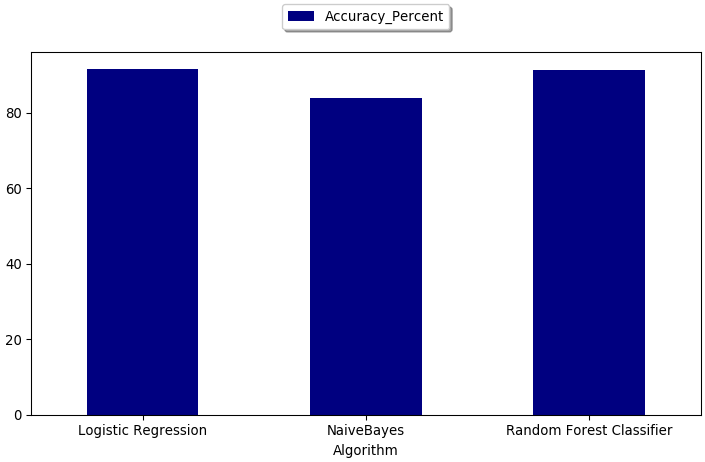

In [ ]:
display(acc)